In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
data = pd.read_csv("data.csv")
print (data.shape)
data.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.995129,4,0.351675,1,7,4,7,3,2,1,-0.144804,-0.217127,-0.034087,39,0
1,-0.046942,4,-0.945524,11,9,2,5,0,4,1,-0.144804,-0.217127,0.772930,39,0
2,-0.776316,2,1.394723,7,12,2,11,0,4,1,-0.144804,-0.217127,-0.034087,39,1
3,0.390683,4,-0.277844,15,10,2,7,0,2,1,0.886874,-0.217127,-0.034087,39,1
4,-1.505691,0,-0.815954,15,10,4,0,3,4,0,-0.144804,-0.217127,-0.841104,39,0


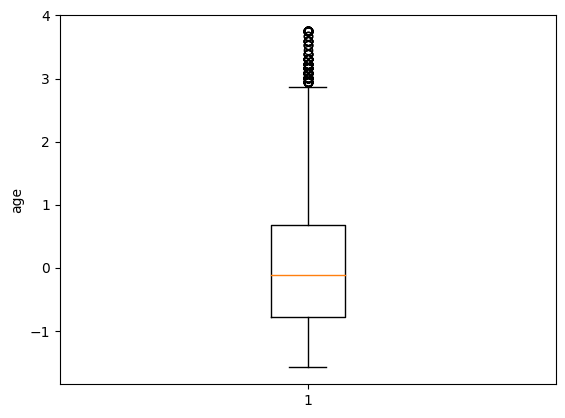

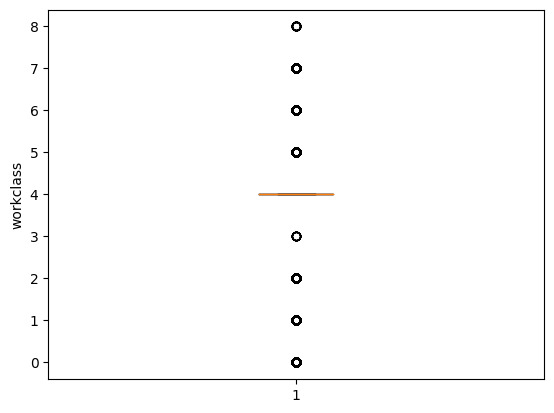

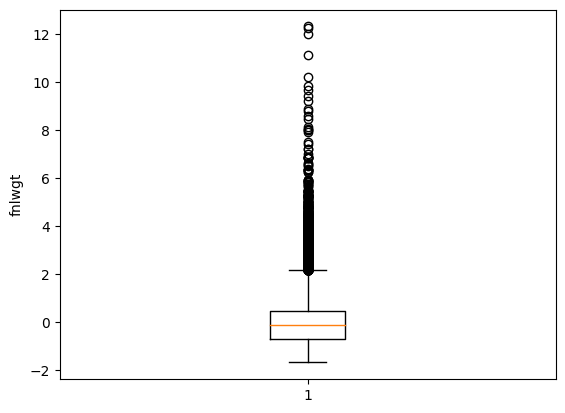

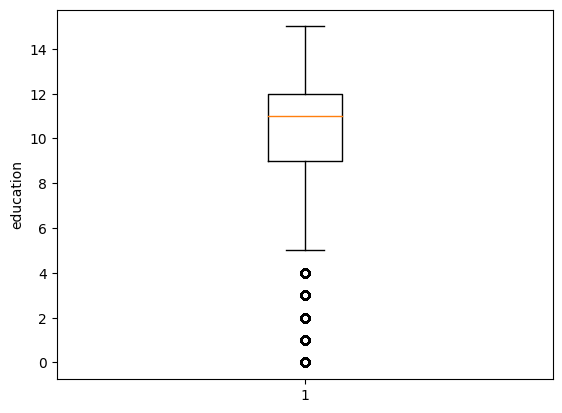

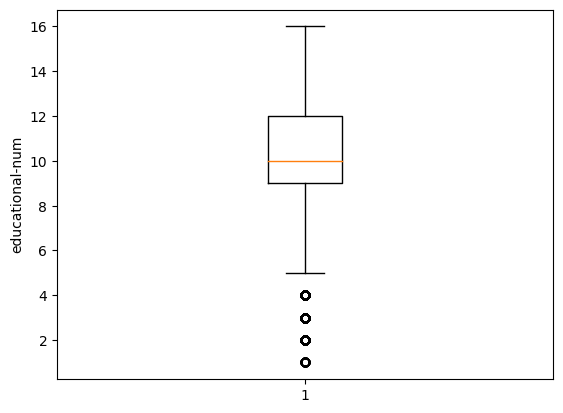

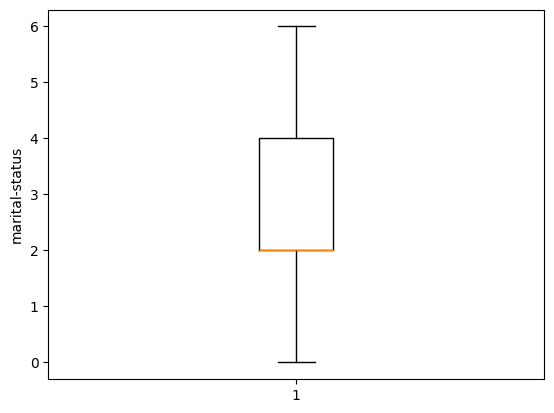

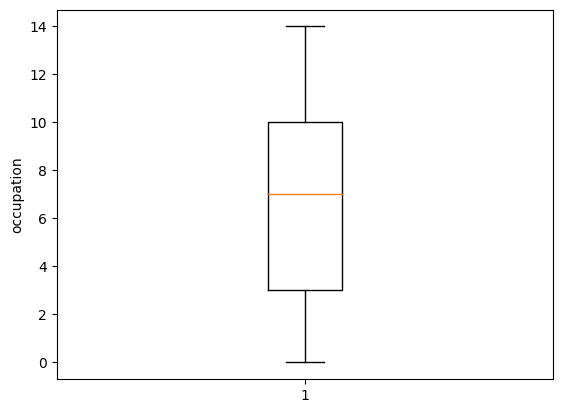

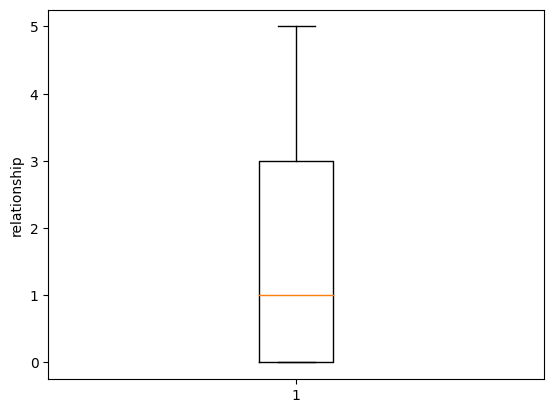

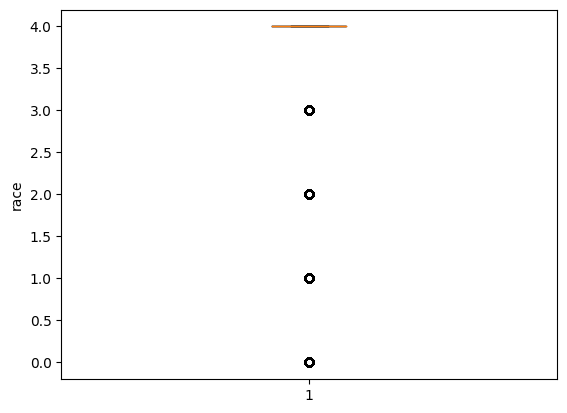

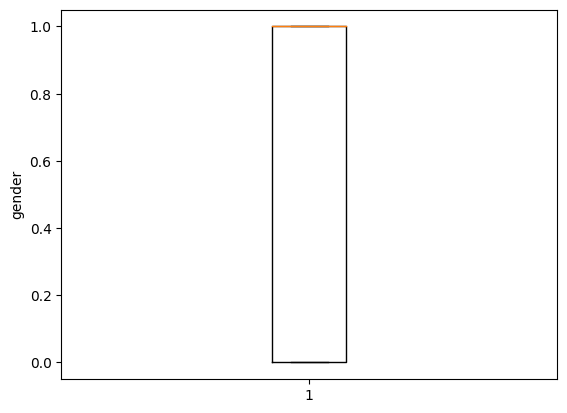

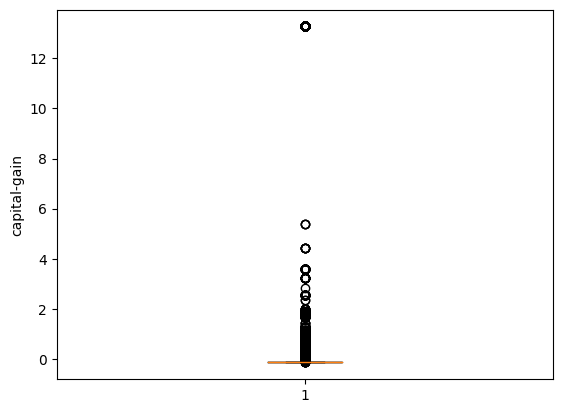

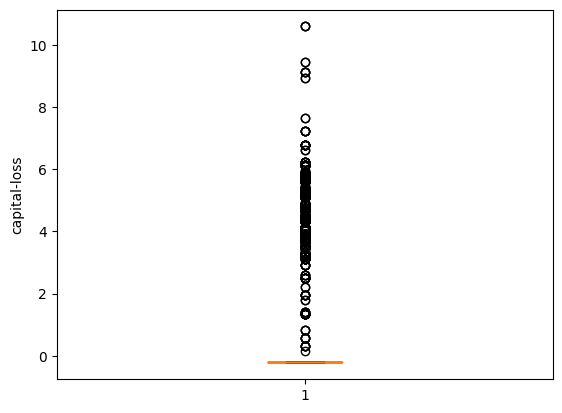

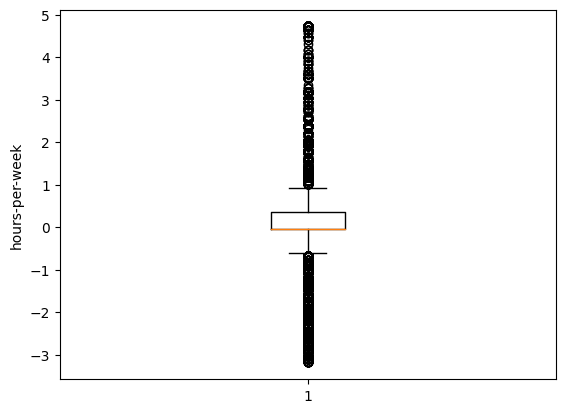

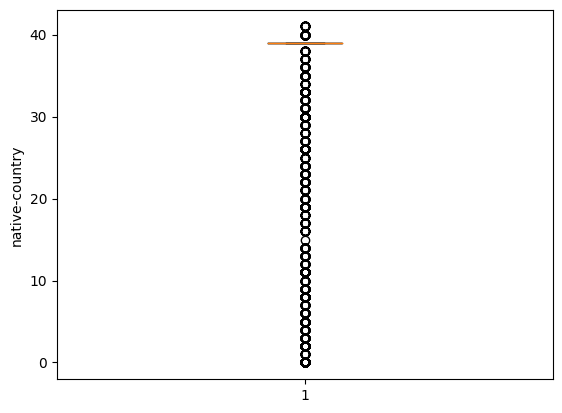

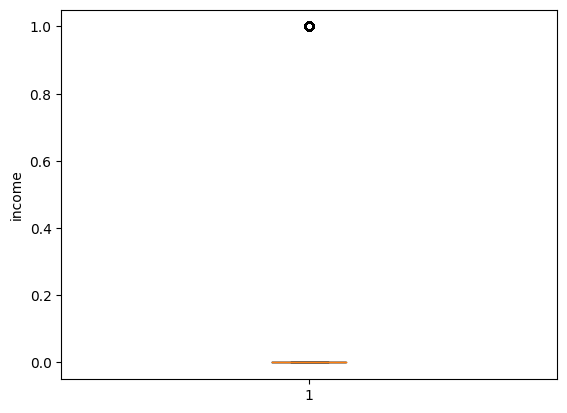

In [3]:
for col in data.columns:
    plt.boxplot(data[col].values)
    plt.ylabel(col)
    plt.show()

In [4]:
cols = []
for col in data.columns:
    # calculate Q1, Q3 and IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # detect outliers
    IQR_outliers = data[((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]
    print (f"{col}: {int((IQR_outliers.shape[0] / data.shape[0]) * 100)}")
    if 0 < (IQR_outliers.shape[0] / data.shape[0] * 100) < 10:
        cols.append(col)

age: 0
workclass: 30
fnlwgt: 2
education: 9
educational-num: 3
marital-status: 0
occupation: 0
relationship: 0
race: 14
gender: 0
capital-gain: 8
capital-loss: 4
hours-per-week: 27
native-country: 10
income: 23


In [5]:
print (cols)

['age', 'fnlwgt', 'education', 'educational-num', 'capital-gain', 'capital-loss']


In [6]:
for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[((data[col] >= (Q1 - 1.5 * IQR)) & (data[col] <= (Q3 + 1.5 * IQR)))]

In [7]:
print (data.shape)
data.head()

(36904, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,-0.046942,4,-0.945524,11,9,2,5,0,4,1,-0.144804,-0.217127,0.772930,39,0
2,-0.776316,2,1.394723,7,12,2,11,0,4,1,-0.144804,-0.217127,-0.034087,39,1
4,-1.505691,0,-0.815954,15,10,4,0,3,4,0,-0.144804,-0.217127,-0.841104,39,0
6,-0.703379,0,0.353796,11,9,4,0,4,2,1,-0.144804,-0.217127,-0.034087,39,0
8,-1.068066,4,1.704525,15,10,4,8,4,4,0,-0.144804,-0.217127,-0.034087,39,0


In [8]:
# Save changes
data.to_csv("data.csv", index=False)